Para importar os arquivos, usamos a célula mágica %run

In [83]:
%run documentacao/2_funcoes.ipynb

In [84]:
df_covid = pd.read_csv('documentacao/dataset/Planilha COVID19 - Aparecida 2021_02112021.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (2,10,15,48,49,64,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Análise Sintomas

In [85]:
df_sintomas = df_covid[['Data de início de sintomas', 'Febre', 'Tosse',
                     'Dispneia', 'Dor de Garganta', 'Fraqueza', 'Mialgia', 'Dor no Peito',
                     'Cefaleia', 'Assintomático', 'Coriza', 'Perda de Olfato',
                     'Perda de Paladar', 'Outros']]

In [86]:
df_sintomas.head()

,Data de início de sintomas,Febre,Tosse,Dispneia,Dor de Garganta,Fraqueza,Mialgia,Dor no Peito,Cefaleia,Assintomático,Coriza,Perda de Olfato,Perda de Paladar,Outros
0,2020-03-12,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,NaN
1,2020-03-29,Não,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,NaN
2,2020-04-08,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,NaN
3,2020-04-30,Não,Sim,Não,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,NaN
4,2020-03-31,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaN


In [87]:
colunas =   ['Febre', 'Tosse','Dispneia', 'Dor de Garganta', 'Fraqueza', 'Mialgia', 
             'Dor no Peito', 'Cefaleia', 'Assintomático', 'Coriza', 'Perda de Olfato',
            'Perda de Paladar', 'Outros'] #colunas com os sintomas, unique para verificar se há apenas não e sim, como, valores


Antes de arrumar

In [88]:
visualizar_valores_unicos_coluna(df_sintomas, colunas)

['Não' 'Sim' 'Nao']
['Sim' 'Não' 's']
['Não' 'Sim' '0']
['Sim' 'Não' '0' 's']
['Não' 'Sim' nan]
['Não' 'Sim' 's' nan]
['Não' 'Sim' '0' 's' nan]
['Não' 'Sim' '0' 's']
['Não' 'Sim' '0' 'sim' nan]
['Sim' 'Não' 's']
['Não' 'Sim' 's' 'NÃ£o' 'não']
['Não' 'Sim' '0' 'n' 's']
[nan 'Examantema, boca amarga' 'Purido nos olhos' ... 'HEMATEMESE'
 'VÔMITO E DIARREIA' 'tontura de forte intensidade']


In [89]:
for col in colunas:
   df_covid[col] = df_covid[col].str.capitalize()
   df_covid.loc[:, col] = np.where(df_covid[col].str.startswith('S'), 'Sim', 'Não')

Depois de arrumar

In [90]:
visualizar_valores_unicos_coluna(df_covid, colunas)

['Não' 'Sim']
['Sim' 'Não']
['Não' 'Sim']
['Sim' 'Não']
['Não' 'Sim']
['Não' 'Sim']
['Não' 'Sim']
['Não' 'Sim']
['Não' 'Sim']
['Sim' 'Não']
['Não' 'Sim']
['Não' 'Sim']
['Sim' 'Não']


Relação sintomas com enfermaria, UTI e quantidade de dias em cada uma

In [91]:
sintomas = colunas
sintomas.remove('Outros')

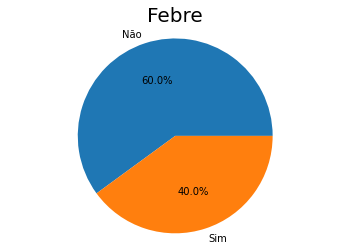

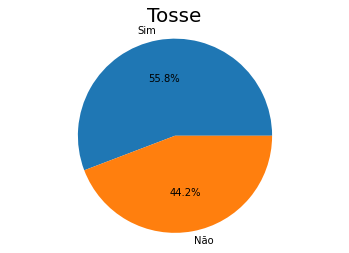

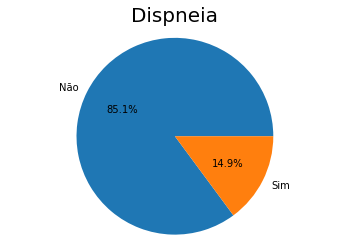

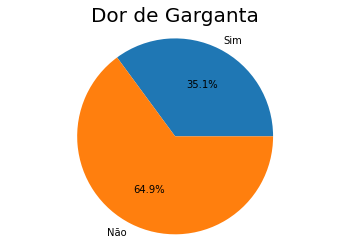

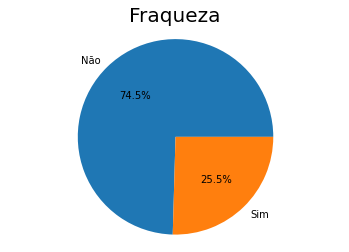

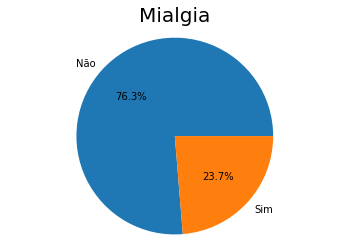

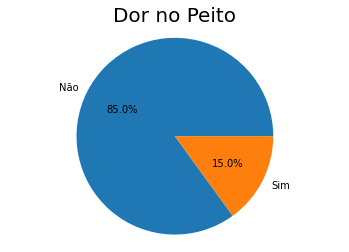

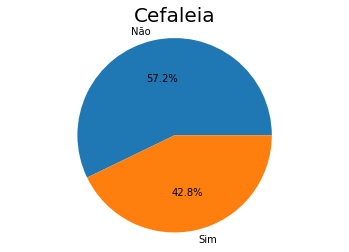

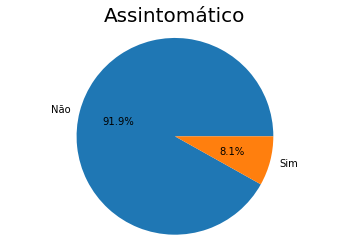

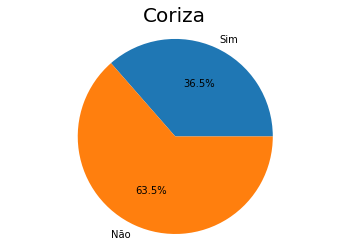

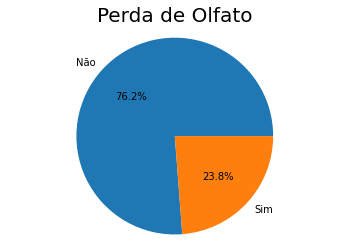

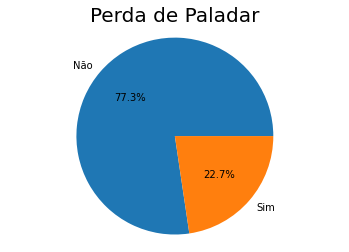

In [92]:
#gráfico de pizza para todos os sintomas listados
for col in sintomas:
    grafico_pizza(df_covid, col)

#### Quantidade de sintomas que uma pessoa apresentou

In [93]:
#nenhum sintoma, 1 - 3, 4 - 6, mais que 6
df_covid['Qt_Sintomas'] = [0] * df_covid.shape[0] #preenchendo a coluna com zeros, do tamanho do dataframe, e quando o valor é sim, é adicionado mais um no valor do elemento
for col in colunas:
    df_covid['Qt_Sintomas'] = np.where(df_covid[col] == 'Sim', df_covid['Qt_Sintomas']+1, df_covid['Qt_Sintomas'])


#### Histograma
É um gráfico de barras que mostra uma distribuição de frequências.

A base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência que o valor de cada classe ocorre.

https://www.alura.com.br/artigos/o-que-e-um-histograma#:~:text=Um%20histograma%20%C3%A9%20uma%20esp%C3%A9cie,valor%20de%20cada%20classe%20ocorre.

<AxesSubplot:>

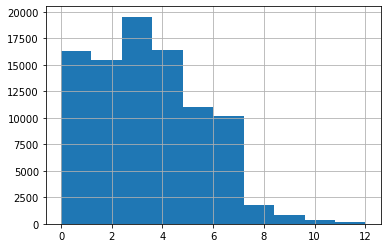

In [94]:
df_covid['Qt_Sintomas'].hist()

#### Describe
Estatísticas descritivas incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo os valores NaN (nulos).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [95]:
df_covid['Qt_Sintomas'].describe()

count    91834.000000
mean         3.437006
std          1.956119
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         12.000000
Name: Qt_Sintomas, dtype: float64

#### Quantidade de sintomas, relação com a evolução do paciente

In [96]:
evolucao = list(df_covid['Evolução'].unique())

In [97]:
evolucao.remove('Cura/Recuperado')

In [98]:
evolucao.remove('Óbito por COVID-19')

In [99]:
evolucao.remove('Isolamento Domiciliar')

Internado - Enfermaria
Internado - UTI 


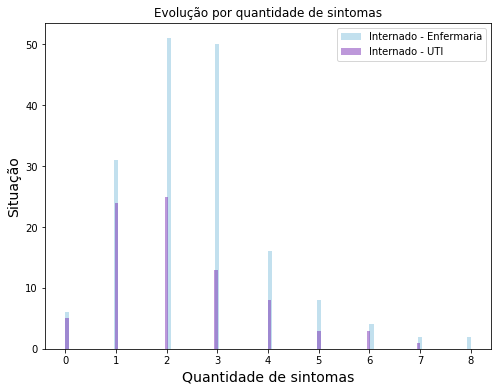

In [100]:
plt.figure(figsize=(8,6))
for col in evolucao:
    print(col)
    aux = df_covid[df_covid['Evolução'] == col] 
    color = gerar_lista_cores(1)
    plt.hist(aux['Qt_Sintomas'], bins=100, alpha=0.5, label=col, color=color)

plt.xlabel("Quantidade de sintomas", size=14)
plt.ylabel("Situação", size=14)
plt.title("Evolução por quantidade de sintomas")
plt.legend(loc='upper right')
    

<AxesSubplot:>

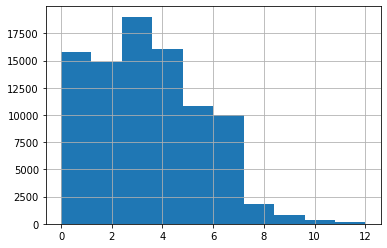

In [101]:
aux = df_covid[df_covid['Evolução'] == 'Cura/Recuperado'] 
aux['Qt_Sintomas'].hist()

<AxesSubplot:>

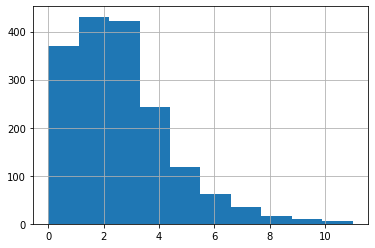

In [102]:
aux = df_covid[df_covid['Evolução'] == 'Óbito por COVID-19'] 
aux['Qt_Sintomas'].hist()

<AxesSubplot:>

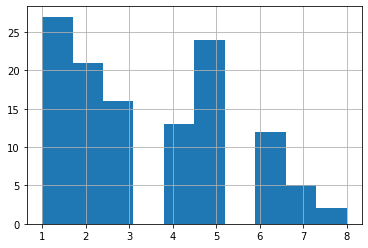

In [103]:
aux = df_covid[df_covid['Evolução'] == 'Isolamento Domiciliar'] 
aux['Qt_Sintomas'].hist()

<AxesSubplot:>

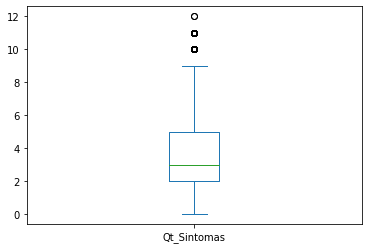

In [104]:
df_covid['Qt_Sintomas'].plot(kind = 'box')